In [1]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime as dt
import altair as alt
import seaborn as sns
import json
%matplotlib inline

In [2]:
july_trip = pd.read_csv('data/july_trip.csv')
july_trip.head()

pubTimeStamp companyName tripRecordNum        sumdID  \
0  2019-07-01 00:02:52.213000        Bird       BRD5179  PoweredZSHKJ   
1  2019-07-01 00:02:52.213000        Bird       BRD5177  Powered22JF6   
2  2019-07-01 00:02:52.213000        Bird       BRD5176  Powered22JF6   
3  2019-07-01 00:02:52.213000        Bird       BRD5178  PoweredIB2CC   
4  2019-07-01 00:02:52.213000        Bird       BRD5180  PoweredW4G7R   

   tripDuration  tripDistance            startDate        startTime  \
0           2.0           0.0  2019-07-01 00:00:00  00:01:32.290000   
1           0.0           0.0  2019-07-01 00:00:00  00:02:38.640000   
2           1.0           0.0  2019-07-01 00:00:00  00:03:04.333333   
3           1.0           0.0  2019-07-01 00:00:00  00:02:06.963333   
4           2.0           0.0  2019-07-01 00:00:00  00:01:19.843333   

               endDate          endTime  startLatitude  startLongitude  \
0  2019-07-01 00:00:00  00:03:55.966666        36.1775        -86.7516   
1  2019-07-01 00:00:00  00:02:54.406666        36.1627        -86.7711   
2  2019-07-01 00:00:00  00:03:37.680000        36.1627        -86.7713   
3  2019-07-01 00:00:00  00:03:25.766666        36.1525        -86.7988   
4  2019-07-01 00:00:00  00:02:53.976666        36.1578        -86.7760   

   endLatitude  endLongitude  \
0      36.1778      -86.7514   
1      36.1627      -86.7711   
2      36.1627      -86.7713   
3      36.1525      -86.7988   
4      36.1575      -86.7758   

                                           tripRoute  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...   
3                           [[36.152499,-86.798708]]   
4                           [[36.157523,-86.775794]]   

                    create_dt  
0  2019-07-02 05:30:18.333000  
1  2019-07-02 05:30:18.273000  
2  2019-07-02 05:30:18.243000  
3  2019-07-02 05:30:18.303000  
4  2019-07-02 05:30:18.363000

In [3]:
july_date_separate1 = july_trip.pubTimeStamp.str.split(" ", expand=True)
july_date_separate1.head()

0                1
0  2019-07-01  00:02:52.213000
1  2019-07-01  00:02:52.213000
2  2019-07-01  00:02:52.213000
3  2019-07-01  00:02:52.213000
4  2019-07-01  00:02:52.213000

In [4]:
july_trip = july_date_separate1.join(july_trip, how='outer')
july_trip.head()

0                1                pubTimeStamp companyName  \
0  2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   
1  2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   
2  2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   
3  2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   
4  2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   

  tripRecordNum        sumdID  tripDuration  tripDistance  \
0       BRD5179  PoweredZSHKJ           2.0           0.0   
1       BRD5177  Powered22JF6           0.0           0.0   
2       BRD5176  Powered22JF6           1.0           0.0   
3       BRD5178  PoweredIB2CC           1.0           0.0   
4       BRD5180  PoweredW4G7R           2.0           0.0   

             startDate        startTime              endDate          endTime  \
0  2019-07-01 00:00:00  00:01:32.290000  2019-07-01 00:00:00  00:03:55.966666   
1  2019-07-01 00:00:00  00:02:38.640000  2019-07-01 00:00:00  00:02:54.406666   
2  2019-07-01 00:00:00  00:03:04.333333  2019-07-01 00:00:00  00:03:37.680000   
3  2019-07-01 00:00:00  00:02:06.963333  2019-07-01 00:00:00  00:03:25.766666   
4  2019-07-01 00:00:00  00:01:19.843333  2019-07-01 00:00:00  00:02:53.976666   

   startLatitude  startLongitude  endLatitude  endLongitude  \
0        36.1775        -86.7516      36.1778      -86.7514   
1        36.1627        -86.7711      36.1627      -86.7711   
2        36.1627        -86.7713      36.1627      -86.7713   
3        36.1525        -86.7988      36.1525      -86.7988   
4        36.1578        -86.7760      36.1575      -86.7758   

                                           tripRoute  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...   
3                           [[36.152499,-86.798708]]   
4                           [[36.157523,-86.775794]]   

                    create_dt  
0  2019-07-02 05:30:18.333000  
1  2019-07-02 05:30:18.273000  
2  2019-07-02 05:30:18.243000  
3  2019-07-02 05:30:18.303000  
4  2019-07-02 05:30:18.363000

In [5]:
july_trip1 = july_trip.drop(columns = 'pubTimeStamp')
july_trip1.head()

0                1 companyName tripRecordNum        sumdID  \
0  2019-07-01  00:02:52.213000        Bird       BRD5179  PoweredZSHKJ   
1  2019-07-01  00:02:52.213000        Bird       BRD5177  Powered22JF6   
2  2019-07-01  00:02:52.213000        Bird       BRD5176  Powered22JF6   
3  2019-07-01  00:02:52.213000        Bird       BRD5178  PoweredIB2CC   
4  2019-07-01  00:02:52.213000        Bird       BRD5180  PoweredW4G7R   

   tripDuration  tripDistance            startDate        startTime  \
0           2.0           0.0  2019-07-01 00:00:00  00:01:32.290000   
1           0.0           0.0  2019-07-01 00:00:00  00:02:38.640000   
2           1.0           0.0  2019-07-01 00:00:00  00:03:04.333333   
3           1.0           0.0  2019-07-01 00:00:00  00:02:06.963333   
4           2.0           0.0  2019-07-01 00:00:00  00:01:19.843333   

               endDate          endTime  startLatitude  startLongitude  \
0  2019-07-01 00:00:00  00:03:55.966666        36.1775        -86.7516   
1  2019-07-01 00:00:00  00:02:54.406666        36.1627        -86.7711   
2  2019-07-01 00:00:00  00:03:37.680000        36.1627        -86.7713   
3  2019-07-01 00:00:00  00:03:25.766666        36.1525        -86.7988   
4  2019-07-01 00:00:00  00:02:53.976666        36.1578        -86.7760   

   endLatitude  endLongitude  \
0      36.1778      -86.7514   
1      36.1627      -86.7711   
2      36.1627      -86.7713   
3      36.1525      -86.7988   
4      36.1575      -86.7758   

                                           tripRoute  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...   
3                           [[36.152499,-86.798708]]   
4                           [[36.157523,-86.775794]]   

                    create_dt  
0  2019-07-02 05:30:18.333000  
1  2019-07-02 05:30:18.273000  
2  2019-07-02 05:30:18.243000  
3  2019-07-02 05:30:18.303000  
4  2019-07-02 05:30:18.363000

In [6]:
july_trip1.columns = ['date', 'time', 'companyName', 'tripRecordNum', 'sumdID', 'tripDuration', 'tripDistance', 'startDate', 'startTime', 'endDate', 'endTime','startLatitude','startLongitude', 'endLatitude', 'endLongitude', 'tripRoute', 'create_dt']
july_trip1.head()

date             time companyName tripRecordNum        sumdID  \
0  2019-07-01  00:02:52.213000        Bird       BRD5179  PoweredZSHKJ   
1  2019-07-01  00:02:52.213000        Bird       BRD5177  Powered22JF6   
2  2019-07-01  00:02:52.213000        Bird       BRD5176  Powered22JF6   
3  2019-07-01  00:02:52.213000        Bird       BRD5178  PoweredIB2CC   
4  2019-07-01  00:02:52.213000        Bird       BRD5180  PoweredW4G7R   

   tripDuration  tripDistance            startDate        startTime  \
0           2.0           0.0  2019-07-01 00:00:00  00:01:32.290000   
1           0.0           0.0  2019-07-01 00:00:00  00:02:38.640000   
2           1.0           0.0  2019-07-01 00:00:00  00:03:04.333333   
3           1.0           0.0  2019-07-01 00:00:00  00:02:06.963333   
4           2.0           0.0  2019-07-01 00:00:00  00:01:19.843333   

               endDate          endTime  startLatitude  startLongitude  \
0  2019-07-01 00:00:00  00:03:55.966666        36.1775        -86.7516   
1  2019-07-01 00:00:00  00:02:54.406666        36.1627        -86.7711   
2  2019-07-01 00:00:00  00:03:37.680000        36.1627        -86.7713   
3  2019-07-01 00:00:00  00:03:25.766666        36.1525        -86.7988   
4  2019-07-01 00:00:00  00:02:53.976666        36.1578        -86.7760   

   endLatitude  endLongitude  \
0      36.1778      -86.7514   
1      36.1627      -86.7711   
2      36.1627      -86.7713   
3      36.1525      -86.7988   
4      36.1575      -86.7758   

                                           tripRoute  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...   
3                           [[36.152499,-86.798708]]   
4                           [[36.157523,-86.775794]]   

                    create_dt  
0  2019-07-02 05:30:18.333000  
1  2019-07-02 05:30:18.273000  
2  2019-07-02 05:30:18.243000  
3  2019-07-02 05:30:18.303000  
4  2019-07-02 05:30:18.363000

In [7]:
july_trip1['companyName'].describe()

count     134926
unique         7
top         Bird
freq       44235
Name: companyName, dtype: object

In [8]:
bird_july = july_trip1.loc[july_trip1.companyName == 'Bird']
bird_july.head()

date             time companyName tripRecordNum        sumdID  \
0  2019-07-01  00:02:52.213000        Bird       BRD5179  PoweredZSHKJ   
1  2019-07-01  00:02:52.213000        Bird       BRD5177  Powered22JF6   
2  2019-07-01  00:02:52.213000        Bird       BRD5176  Powered22JF6   
3  2019-07-01  00:02:52.213000        Bird       BRD5178  PoweredIB2CC   
4  2019-07-01  00:02:52.213000        Bird       BRD5180  PoweredW4G7R   

   tripDuration  tripDistance            startDate        startTime  \
0           2.0           0.0  2019-07-01 00:00:00  00:01:32.290000   
1           0.0           0.0  2019-07-01 00:00:00  00:02:38.640000   
2           1.0           0.0  2019-07-01 00:00:00  00:03:04.333333   
3           1.0           0.0  2019-07-01 00:00:00  00:02:06.963333   
4           2.0           0.0  2019-07-01 00:00:00  00:01:19.843333   

               endDate          endTime  startLatitude  startLongitude  \
0  2019-07-01 00:00:00  00:03:55.966666        36.1775        -86.7516   
1  2019-07-01 00:00:00  00:02:54.406666        36.1627        -86.7711   
2  2019-07-01 00:00:00  00:03:37.680000        36.1627        -86.7713   
3  2019-07-01 00:00:00  00:03:25.766666        36.1525        -86.7988   
4  2019-07-01 00:00:00  00:02:53.976666        36.1578        -86.7760   

   endLatitude  endLongitude  \
0      36.1778      -86.7514   
1      36.1627      -86.7711   
2      36.1627      -86.7713   
3      36.1525      -86.7988   
4      36.1575      -86.7758   

                                           tripRoute  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...   
3                           [[36.152499,-86.798708]]   
4                           [[36.157523,-86.775794]]   

                    create_dt  
0  2019-07-02 05:30:18.333000  
1  2019-07-02 05:30:18.273000  
2  2019-07-02 05:30:18.243000  
3  2019-07-02 05:30:18.303000  
4  2019-07-02 05:30:18.363000

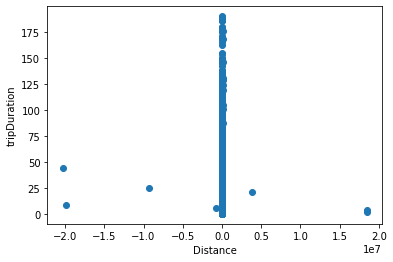

In [9]:
#Create some scatterplots:bird scooters tripduration vs distance
plt.scatter(bird_july.tripDistance, bird_july.tripDuration,)
plt.xlabel('Distance')
plt.ylabel('tripDuration')
plt.show()

In [10]:
#Numbers of scooters with zero trip Duration
zero_july_trip = bird_july.loc[bird_july['tripDuration'] == 0]
zero_july_trip.companyName.value_counts()

Bird    1093
Name: companyName, dtype: int64

In [11]:
bird_july.shape

(44235, 17)

In [12]:
zero_july_trip.describe()

tripDuration  tripDistance  startLatitude  startLongitude  endLatitude  \
count        1093.0   1093.000000    1093.000000     1093.000000  1093.000000   
mean            0.0     31.517676      36.157704      -86.784493    36.157710   
std             0.0    408.257690       0.009227        0.012981     0.009228   
min             0.0      0.000000      36.120600      -86.835900    36.120600   
25%             0.0      0.000000      36.152400      -86.790100    36.152500   
50%             0.0      0.000000      36.158900      -86.780900    36.158900   
75%             0.0      0.000000      36.163000      -86.776900    36.163000   
max             0.0   9186.352000      36.193400      -86.725400    36.193400   

       endLongitude  
count   1093.000000  
mean     -86.784486  
std        0.012987  
min      -86.835900  
25%      -86.790100  
50%      -86.780900  
75%      -86.776900  
max      -86.725400

In [13]:
bird_july[bird_july.tripDistance >=1]

date             time companyName tripRecordNum        sumdID  \
19      2019-07-01  00:12:52.437000        Bird       BRD5286  PoweredI5BFF   
20      2019-07-01  00:12:52.437000        Bird       BRD5276  PoweredPQLXE   
22      2019-07-01  00:12:52.437000        Bird       BRD5281  PoweredUQE8Q   
41      2019-07-01  00:17:52.840000        Bird       BRD5337  PoweredVZBRL   
42      2019-07-01  00:17:52.840000        Bird       BRD5330  Powered9Y3SG   
...            ...              ...         ...           ...           ...   
134852  2019-08-01  00:00:06.593000        Bird       BRD1817  PoweredQDRMQ   
134853  2019-08-01  00:00:06.593000        Bird       BRD1815  Powered3IFAH   
134866  2019-08-01  00:05:06.727000        Bird       BRD1831  PoweredQST3S   
134867  2019-08-01  00:05:06.727000        Bird       BRD1829  PoweredSEWAF   
134868  2019-08-01  00:05:06.727000        Bird       BRD1830  PoweredV152F   

        tripDuration  tripDistance            startDate        startTime  \
19              13.0      5249.344  2019-07-01 00:00:00  00:01:05.206666   
20               5.0      1968.504  2019-07-01 00:00:00  00:10:16.383333   
22               6.0      2624.672  2019-07-01 00:00:00  00:08:18.700000   
41              11.0       656.168  2019-07-01 00:00:00  00:07:16.843333   
42               5.0      2952.756  2019-07-01 00:00:00  00:14:35.700000   
...              ...           ...                  ...              ...   
134852           8.0       328.084  2019-07-31 00:00:00  23:53:41.416666   
134853           3.0       984.252  2019-07-31 00:00:00  23:58:09.780000   
134866          54.0     29527.560  2019-07-31 00:00:00  23:12:14.106666   
134867          48.0     30839.896  2019-07-31 00:00:00  23:18:58.526666   
134868          48.0     29855.644  2019-07-31 00:00:00  23:18:49.366666   

                    endDate          endTime  startLatitude  startLongitude  \
19      2019-07-01 00:00:00  00:14:11.033333        36.1783        -86.7773   
20      2019-07-01 00:00:00  00:14:50.046666        36.1642        -86.7695   
22      2019-07-01 00:00:00  00:14:07.393333        36.1581        -86.7843   
41      2019-07-01 00:00:00  00:18:17.673333        36.1681        -86.7827   
42      2019-07-01 00:00:00  00:19:41.443333        36.1564        -86.7744   
...                     ...              ...            ...             ...   
134852  2019-08-01 00:00:00  00:01:58.773333        36.1523        -86.7839   
134853  2019-08-01 00:00:00  00:00:55.853333        36.1572        -86.7706   
134866  2019-08-01 00:00:00  00:06:44.106666        36.1638        -86.7754   
134867  2019-08-01 00:00:00  00:06:38.356666        36.1638        -86.7755   
134868  2019-08-01 00:00:00  00:06:43.453333        36.1637        -86.7755   

        endLatitude  endLongitude  \
19          36.1782      -86.7748   
20          36.1600      -86.7754   
22          36.1582      -86.7841   
41          36.1679      -86.7834   
42          36.1595      -86.7764   
...             ...           ...   
134852      36.1458      -86.7804   
134853      36.1560      -86.7739   
134866      36.1617      -86.7754   
134867      36.1620      -86.7743   
134868      36.1637      -86.7700   

                                                tripRoute  \
19      [[36.178357,-86.777234],[36.178172,-86.777141]...   
20      [[36.164204,-86.76942],[36.164141,-86.769547],...   
22                               [[36.158274,-86.784019]]   
41      [[36.167951,-86.782828],[36.168101,-86.78329],...   
42      [[36.156421,-86.77438],[36.156525,-86.774747],...   
...                                                   ...   
134852  [[36.152383,-86.783852],[36.152464,-86.783695]...   
134853  [[36.157364,-86.770644],[36.157206,-86.770899]...   
134866  [[36.163812,-86.775398],[36.16383,-86.775253],...   
134867  [[36.163877,-86.775442],[36.1638,-86.775503],[...   
134868  [[36.16378,-86.775306],[36.16378,-86.775306],[...   

                         

In [14]:
#Creating dataframe with scooters trips greater equal to 1 or greater
is_greater = bird_july.tripDistance >=1
is_greater.head()

0    False
1    False
2    False
3    False
4    False
Name: tripDistance, dtype: bool

In [15]:
bird_july[is_greater]

date             time companyName tripRecordNum        sumdID  \
19      2019-07-01  00:12:52.437000        Bird       BRD5286  PoweredI5BFF   
20      2019-07-01  00:12:52.437000        Bird       BRD5276  PoweredPQLXE   
22      2019-07-01  00:12:52.437000        Bird       BRD5281  PoweredUQE8Q   
41      2019-07-01  00:17:52.840000        Bird       BRD5337  PoweredVZBRL   
42      2019-07-01  00:17:52.840000        Bird       BRD5330  Powered9Y3SG   
...            ...              ...         ...           ...           ...   
134852  2019-08-01  00:00:06.593000        Bird       BRD1817  PoweredQDRMQ   
134853  2019-08-01  00:00:06.593000        Bird       BRD1815  Powered3IFAH   
134866  2019-08-01  00:05:06.727000        Bird       BRD1831  PoweredQST3S   
134867  2019-08-01  00:05:06.727000        Bird       BRD1829  PoweredSEWAF   
134868  2019-08-01  00:05:06.727000        Bird       BRD1830  PoweredV152F   

        tripDuration  tripDistance            startDate        startTime  \
19              13.0      5249.344  2019-07-01 00:00:00  00:01:05.206666   
20               5.0      1968.504  2019-07-01 00:00:00  00:10:16.383333   
22               6.0      2624.672  2019-07-01 00:00:00  00:08:18.700000   
41              11.0       656.168  2019-07-01 00:00:00  00:07:16.843333   
42               5.0      2952.756  2019-07-01 00:00:00  00:14:35.700000   
...              ...           ...                  ...              ...   
134852           8.0       328.084  2019-07-31 00:00:00  23:53:41.416666   
134853           3.0       984.252  2019-07-31 00:00:00  23:58:09.780000   
134866          54.0     29527.560  2019-07-31 00:00:00  23:12:14.106666   
134867          48.0     30839.896  2019-07-31 00:00:00  23:18:58.526666   
134868          48.0     29855.644  2019-07-31 00:00:00  23:18:49.366666   

                    endDate          endTime  startLatitude  startLongitude  \
19      2019-07-01 00:00:00  00:14:11.033333        36.1783        -86.7773   
20      2019-07-01 00:00:00  00:14:50.046666        36.1642        -86.7695   
22      2019-07-01 00:00:00  00:14:07.393333        36.1581        -86.7843   
41      2019-07-01 00:00:00  00:18:17.673333        36.1681        -86.7827   
42      2019-07-01 00:00:00  00:19:41.443333        36.1564        -86.7744   
...                     ...              ...            ...             ...   
134852  2019-08-01 00:00:00  00:01:58.773333        36.1523        -86.7839   
134853  2019-08-01 00:00:00  00:00:55.853333        36.1572        -86.7706   
134866  2019-08-01 00:00:00  00:06:44.106666        36.1638        -86.7754   
134867  2019-08-01 00:00:00  00:06:38.356666        36.1638        -86.7755   
134868  2019-08-01 00:00:00  00:06:43.453333        36.1637        -86.7755   

        endLatitude  endLongitude  \
19          36.1782      -86.7748   
20          36.1600      -86.7754   
22          36.1582      -86.7841   
41          36.1679      -86.7834   
42          36.1595      -86.7764   
...             ...           ...   
134852      36.1458      -86.7804   
134853      36.1560      -86.7739   
134866      36.1617      -86.7754   
134867      36.1620      -86.7743   
134868      36.1637      -86.7700   

                                                tripRoute  \
19      [[36.178357,-86.777234],[36.178172,-86.777141]...   
20      [[36.164204,-86.76942],[36.164141,-86.769547],...   
22                               [[36.158274,-86.784019]]   
41      [[36.167951,-86.782828],[36.168101,-86.78329],...   
42      [[36.156421,-86.77438],[36.156525,-86.774747],...   
...                                                   ...   
134852  [[36.152383,-86.783852],[36.152464,-86.783695]...   
134853  [[36.157364,-86.770644],[36.157206,-86.770899]...   
134866  [[36.163812,-86.775398],[36.16383,-86.775253],...   
134867  [[36.163877,-86.775442],[36.1638,-86.775503],[...   
134868  [[36.16378,-86.775306],[36.16378,-86.775306],[...   

                         

In [ ]:
#Look at the distribution of gdp per capita values for 2014. Is it unimodal?
plt.scatter(bird_july.companyName)
plt.xlabel('companyName')
plt.title('July Bird Scooters')
plt.show()

In [18]:
lime_july = july_trip1.loc[july_trip1.companyName == 'Lime']
lime_july.head()

date             time companyName tripRecordNum  \
227  2019-07-01  00:54:49.467000        Lime     LIM784824   
228  2019-07-01  00:54:49.470000        Lime     LIM784825   
229  2019-07-01  00:54:49.477000        Lime     LIM784829   
230  2019-07-01  00:54:49.490000        Lime     LIM784835   
231  2019-07-01  00:54:49.497000        Lime     LIM784837   

                   sumdID  tripDuration  tripDistance            startDate  \
227  Powered5E4E4EFXSEU55           2.0    782.872780  2019-07-01 00:00:00   
228  Powered5PJGLNYHMC4KV           1.0    413.195448  2019-07-01 00:00:00   
229  PoweredCGGCR4WGYBID4           4.0   3545.810316  2019-07-01 00:00:00   
230  PoweredQMAWP32U2M7CL           5.0   3302.785000  2019-07-01 00:00:00   
231  Powered26HUCBQ7GIPIU           1.0     31.924046  2019-07-01 00:00:00   

    startTime              endDate   endTime  startLatitude  startLongitude  \
227  00:00:59  2019-07-01 00:00:00  00:02:25      36.126791      -86.793157   
228  00:01:40  2019-07-01 00:00:00  00:02:58      36.160961      -86.781373   
229  00:00:05  2019-07-01 00:00:00  00:04:28      36.154505      -86.774513   
230  00:04:29  2019-07-01 00:00:00  00:09:10      36.150853      -86.782701   
231  00:10:50  2019-07-01 00:00:00  00:11:06      36.157086      -86.772367   

     endLatitude  endLongitude  \
227    36.126536    -86.790243   
228    36.162264    -86.782569   
229    36.154533    -86.774531   
230    36.153488    -86.788992   
231    36.157089    -86.772335   

                                             tripRoute  \
227  [[36.12679,-86.79316],[36.12679,-86.79255],[36...   
228  [[36.16096,-86.78137],[36.161260000000006,-86....   
229  [[36.1545,-86.77451],[36.15459,-86.77452000000...   
230  [[36.15085,-86.7827],[36.150839999999995,-86.7...   
231  [[36.15709,-86.77237],[36.157129999999995,-86....   

                      create_dt  
227  2019-07-02 08:43:37.633000  
228  2019-07-02 08:43:37.663000  
229  2019-07-02 08:43:37.807000  
230  2019-07-02 08:43:37.990000  
231  2019-07-02 08:43:38.057000

In [19]:
# the numbers of scooters with comany name in the month of July with 0.0 trip duration
zero_july_trip = july_trip.loc[july_trip['tripDuration'] == 0]
zero_july_trip.companyName.value_counts()

Bird    1093
Lime     583
Name: companyName, dtype: int64

In [20]:
#trip distance of more than 1/4 mile which is 1320 feet.
travel_distance = july_trip.query('tripDistance >=1.0')
travel_distance.head()

0                1                pubTimeStamp companyName  \
5   2019-07-01  00:03:52.060000  2019-07-01 00:03:52.060000        Lyft   
10  2019-07-01  00:08:01.777000  2019-07-01 00:08:01.777000        Lyft   
11  2019-07-01  00:08:15.163000  2019-07-01 00:08:15.163000        Lyft   
12  2019-07-01  00:09:50.063000  2019-07-01 00:09:50.063000        Lyft   
13  2019-07-01  00:10:03.083000  2019-07-01 00:10:03.083000        Lyft   

   tripRecordNum         sumdID  tripDuration  tripDistance  \
5           LFT7  Powered840423      3.716183    2375.32816   
10         LFT11  Powered414680      6.297550    5488.84532   
11         LFT12  Powered635347      6.776617    5383.85844   
12         LFT15  Powered883367      7.443667    4379.92140   
13         LFT16  Powered937680      1.487350     104.98688   

              startDate        startTime              endDate  \
5   2019-07-01 00:00:00  00:00:08.963333  2019-07-01 00:00:00   
10  2019-07-01 00:00:00  00:01:43.776666  2019-07-01 00:00:00   
11  2019-07-01 00:00:00  00:01:28.440000  2019-07-01 00:00:00   
12  2019-07-01 00:00:00  00:02:23.333333  2019-07-01 00:00:00   
13  2019-07-01 00:00:00  00:08:33.696666  2019-07-01 00:00:00   

            endTime  startLatitude  startLongitude  endLatitude  endLongitude  \
5   00:03:51.933333       36.14933       -86.79760     36.15265     -86.79706   
10  00:08:01.630000       36.15249       -86.79472     36.13892     -86.80048   
11  00:08:15.036666       36.15234       -86.79483     36.13895     -86.80047   
12  00:09:49.953333       36.13676       -86.80596     36.13664     -86.80535   
13  00:10:02.936666       36.14824       -86.80669     36.14834     -86.80684   

                                            tripRoute  \
5   [[36.14933,-86.7976],[36.14942,-86.7975],[36.1...   
10  [[36.15249,-86.79472],[36.15235,-86.79489],[36...   
11  [[36.15234,-86.79483],[36.15219,-86.79494],[36...   
12  [[36.13676,-86.80596],[36.13695,-86.80611],[36...   
13  [[36.14824,-86.80669],[36.1483,-86.80679],[36....   

                     create_dt  
5   2019-07-02 09:34:36.953000  
10  2019-07-02 09:34:37.087000  
11  2019-07-02 09:34:37.120000  
12  2019-07-02 09:34:37.217000  
13  2019-07-02 09:34:37.253000

In [21]:
# time duration of greater than 10 minutes and less than 60 minutes
trip_distance = travel_distance.query('10<=tripDuration<=60')
trip_distance.companyName.value_counts()

Lime             17909
Lyft             13522
Bird             12824
SPIN              6823
JUMP              2515
Gotcha             265
Bolt Mobility       44
Name: companyName, dtype: int64

In [36]:
# time duration of less than 3 minutes and less than 60 minutes
trip_distance_less = travel_distance.query('tripDuration<=1')
trip_distance_less.companyName.value_counts()

Lime      1109
Lyft       222
Gotcha     212
Bird        98
Name: companyName, dtype: int64

In [22]:
#Total Count of scooters that belong to each company sorted by ID number.
july_trips_groups = july_trip.groupby('companyName')['sumdID'].nunique()
july_trips_groups

companyName
Bird             2471
Bolt Mobility     268
Gotcha            103
JUMP              409
Lime              810
Lyft             1012
SPIN              512
Name: sumdID, dtype: int64

In [35]:
#Total Count of scooters that belong to each company sorted by ID number.
july_trips_dist = july_trip.groupby('companyName')['tripDistance'].nunique()
july_trips_dist

companyName
Bird               296
Bolt Mobility     4018
Gotcha             638
JUMP               434
Lime             36171
Lyft               782
SPIN              2710
Name: tripDistance, dtype: int64

In [23]:
# Access number of null values using the .info() method.
july_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 18 columns):
0                 134926 non-null object
1                 134926 non-null object
pubTimeStamp      134926 non-null object
companyName       134926 non-null object
tripRecordNum     134926 non-null object
sumdID            134926 non-null object
tripDuration      134926 non-null float64
tripDistance      134926 non-null float64
startDate         134926 non-null object
startTime         134926 non-null object
endDate           134926 non-null object
endTime           134926 non-null object
startLatitude     134926 non-null float64
startLongitude    134926 non-null float64
endLatitude       134926 non-null float64
endLongitude      134926 non-null float64
tripRoute         134926 non-null object
create_dt         134926 non-null object
dtypes: float64(6), object(12)
memory usage: 18.5+ MB


In [24]:
#The final cleaning step consists of evaluating whether there are duplicated entries in the data frame. If so, we will remove these duplicated entries from the data frame, as they represent the same car accident.
july_trip.duplicated('sumdID').sum()

129341

In [25]:
# Print duplicated rows.
july_trip[july_trip.duplicated('sumdID')]

0                1                pubTimeStamp companyName  \
2       2019-07-01  00:02:52.213000  2019-07-01 00:02:52.213000        Bird   
14      2019-07-01  00:11:17.113000  2019-07-01 00:11:17.113000        Lyft   
53      2019-07-01  00:21:18.260000  2019-07-01 00:21:18.260000        Lyft   
55      2019-07-01  00:22:13.663000  2019-07-01 00:22:13.663000        Lyft   
63      2019-07-01  00:22:53.027000  2019-07-01 00:22:53.027000        Bird   
...            ...              ...                         ...         ...   
134921  2019-08-01         04:53:48         2019-08-01 04:53:48        JUMP   
134922  2019-08-01         04:53:48         2019-08-01 04:53:48        JUMP   
134923  2019-08-01         04:53:48         2019-08-01 04:53:48        JUMP   
134924  2019-08-01         07:04:00         2019-08-01 07:04:00        JUMP   
134925  2019-08-01         07:04:00         2019-08-01 07:04:00        JUMP   

       tripRecordNum                                       sumdID  \
2            BRD5176                                 Powered22JF6   
14             LFT18                                Powered840423   
53             LFT35                                Powered890532   
55             LFT37                                Powered890532   
63           BRD5383                                 PoweredC4RNV   
...              ...                                          ...   
134921          JMP3  Powered5614e4fc-1971-5e5c-a545-0fd88cd3331d   
134922          JMP2  Powereda4712099-5e55-5332-996c-d6e5c910535d   
134923          JMP1  Poweredb8a3a269-d1ca-571f-9b2f-89b7399b5537   
134924         JMP35  Poweredf077a919-d569-5e70-8ca7-71d179ffacf9   
134925         JMP34  Powered784fcc92-bd1a-5f6a-8314-b02aa21b4bfa   

        tripDuration  tripDistance            startDate        startTime  \
2           1.000000       0.00000  2019-07-01 00:00:00  00:03:04.333333   
14          4.432367    3851.70616  2019-07-01 00:00:00  00:06:50.833333   
53          2.855667     367.45408  2019-07-01 00:00:00  00:18:26.826666   
55          0.774300       0.00000  2019-07-01 00:00:00  00:21:27.100000   
63          8.000000       0.00000  2019-07-01 00:00:00  00:16:41.106666   
...              ...           ...                  ...              ...   
134921     17.497950    7075.20000  2019-07-31 00:00:00         23:47:43   
134922      3.154917    1320.00000  2019-07-31 00:00:00         23:57:19   
134923     18.440650    7920.00000  2019-07-31 00:00:00         23:41:52   
134924    142.345610   20433.60000  2019-07-31 00:00:00         23:26:15   
134925    209.409650   14889.60000  2019-07-31 00:00:00         22:19:08   

                    endDate          endTime  startLatitude  startLongitude  \
2       2019-07-01 00:00:00  00:03:37.680000      36.162700      -86.771300   
14      2019-07-01 00:00:00  00:11:16.776666      36.152650      -86.797090   
53      2019-07-01 00:00:00  00:21:18.166666      36.152490      -86.791240   
55      2019-07-01 00:00:00  00:22:13.560000      36.152850      -86.790330   
63      2019-07-01 00:00:00  00:24:15.403333      36.162600      -86.779400   
...                     ...              ...            ...             ...   
134921  2019-08-01 00:00:00         00:05:13      36.154633      -86.798340   
134922  2019-08-01 00:00:00         00:00:28      36.153015      -86.783585   
134923  2019-08-01 00:00:00         00:00:18      36.153687      -86.784580   
134924  2019-08-01 00:00:00         01:48:35      36.155735      -86.775185   
134925  2019-08-01 00:00:00         01:48:33      36.160050      -86.776720   

        endLatitude  endLongitude  \
2         36.162700    -86.771300   
14        36.148050    -86.807950   
53        36.152850    -86.790330   
55        36.152840    -86.790320   
63        36.160800    -86.781500   
...             ...           ...   
134921    36.149220    -86.813980   
134922    36.152843    -86.779594   
134923    36.164158    -86.776900   
134924 

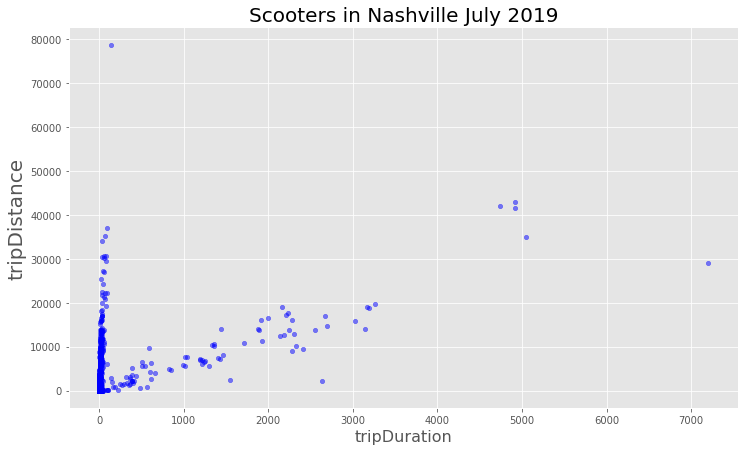

In [26]:
plt.style.use('ggplot')
# plot trips per month
# create a subset for the july trip
july_subset = july_trip.head(1000)
july_subset.plot(kind='scatter', x='tripDuration', y='tripDistance', figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Scooters in Nashville July 2019', fontsize=20)
plt.xlabel('tripDuration',fontsize=16)
plt.ylabel('tripDistance',fontsize=20);

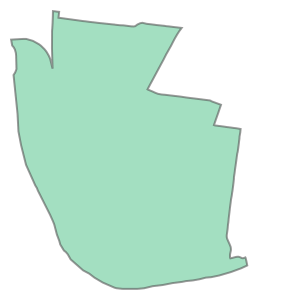

In [27]:
promise_zones = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp')
promise_zones.loc[0, 'geometry']


In [28]:
#Create a map object of the city of Nashville
nashville_tn_map= folium.Map(location=[36.1627, -86.7816], zoom_start=12)
july_subset2 = july_trip.head(1000)

# Display only the where one scooter record
for lat, lng, label in zip(july_subset2.startLatitude, july_subset2.startLongitude, july_subset2.sumdID.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(nashville_tn_map)
    
# Show map
display(nashville_tn_map)

In [29]:
folium.GeoJson(promise_zones).add_to(nashville_tn_map)
nashville_tn_map

In [30]:
center = center = [36.1627, -86.7816]
nashville_tn_map = folium.Map(location =  center, zoom_start = 12)
nashville_tn_map
for row in lime_july.head(100).iterrows():
   row_values = row[1]
   location = [row_values['startLatitude'], row_values['startLongitude']]
   popup = (str(row_values['sumdID']) + ': ' +
            str(row_values['date']) + '<br/>' +
            str(row_values['time'])).replace("'", "`")
   marker = folium.Marker(location = location, popup = popup)
   marker.add_to(nashville_tn_map)
display(nashville_tn_map)

In [31]:
folium.GeoJson(promise_zones).add_to(nashville_tn_map)
nashville_tn_map

In [32]:
center = folium.Map([36.1627, -86.7816], zoom_start=11)
for _, row in lime_july.head(100).iterrows():
  folium.Marker([row['startLatitude'], row['startLongitude']],
           popup = (str(row_values['sumdID']) + ': ' +
           str(row_values['tripRecordNum']) + '<br/>' +
           str(row_values['startTime'])).replace("'", "`"),
                      icon=folium.Icon(color='blue')).add_to(center)
  folium.Marker([row['endLatitude'], row['endLongitude']],
                      icon=folium.Icon(color='megenta')).add_to(center)
  folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                   [row['endLatitude'], row['endLongitude']]]).add_to(center)
center
center
nashville = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp')
nashville.loc[0,'geometry']
folium.GeoJson(nashville).add_to(center)
center


